# The sample guessing game
In this game, we analyze 6 files, `sample[0-6].root` that are each a small 500k event sample of a CMS NanoAOD dataset.  All generator-level branches have been removed.  Your task is to figure out which file came from which dataset.  To make it a bit easier, here are the 6 possible datasets:

   * `DY2JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8`, producing $Z(\to \ell\ell)+2j$ events via QCD processes;
   * `EWKZ2Jets_ZToLL_M-50_TuneCP5_PSweights_13TeV-madgraph-pythia8`, producing $Z(\to \ell\ell)+2j$ events via EW processes (i.e. primarily vector boson fusion);
   * `GluGluHToWWTo2L2Nu_M125_13TeV_powheg2_JHUGenV714_pythia8`, producing Higgs boson events through gluon fusion, where the Higgs boson decays via $H\to WW^{*}\to 2\ell2\nu$;
   * `GluGluHToZZTo2L2Q_M125_13TeV_powheg2_JHUGenV7011_pythia8`, producing Higgs boson events through gluon fusion, where the Higgs boson decays via $H\to ZZ^{*}\to 2\ell2q$;
   * `TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8`, producing di-top events, where both top quarks must decay leptonically; and
   * `WWTo2L2Nu_NNPDF31_TuneCP5_13TeV-powheg-pythia8`, producing WW diboson events, where both W bosons decay leptonically $W\to \ell\nu$.
   
In all cases, the lepton can be any flavor, $\ell\in\{e,\mu,\tau\}$.  All 6 datasets were produced with the `RunIIAutumn18NanoAODv4-Nano14Dec2018_102X_upgrade2018_realistic_v16-v1` conditions tag.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from coffea import hist
from coffea.nanoaod import NanoEvents

In [18]:
prefix = 'root://cmseos.fnal.gov//store/user/ncsmith/samplegame/'
samples = [
    NanoEvents.from_file(prefix + "sample%d.root" % i, entrystop=50000)
    for i in range(6)
]

In [3]:
h = hist.Hist(
    "Counts",
    hist.Cat("sample", "Sample"),
    hist.Bin("btagDeepB", "b tagging score", 50, 0, 1)
)

for i, sample in enumerate(samples):
    name = "sample %d" % i
    h.fill(sample=name, btagDeepB=sample.Jet.btagDeepB.flatten())

/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


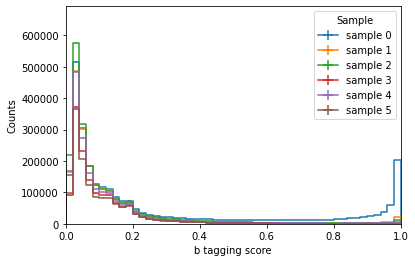

In [4]:
hist.plot1d(h, overlay="sample", )

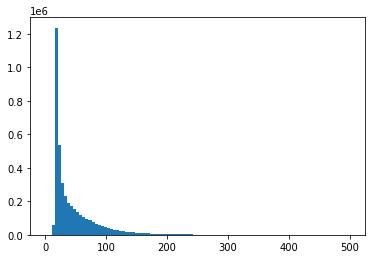

In [5]:
plt.hist(samples[0].Jet.pt.flatten(), bins=np.linspace(0, 500, 100));

In [48]:
samples[0].columns

['TkMET',
 'SoftActivityJetNjets5',
 'fixedGridRhoFastjetCentralNeutral',
 'genWeight',
 'Muon',
 'SoftActivityJetNjets2',
 'SoftActivityJetHT2',
 'Tau',
 'SoftActivityJetHT10',
 'PuppiMET',
 'run',
 'TrigObj',
 'SubJet',
 'Jet',
 'L1Reco',
 'SoftActivityJet',
 'luminosityBlock',
 'SV',
 'fixedGridRhoFastjetCentralCalo',
 'IsoTrack',
 'MET',
 'Pileup',
 'SoftActivityJetHT5',
 'SoftActivityJetNjets10',
 'FatJet',
 'btagWeight',
 'ChsMET',
 'SoftActivityJetHT',
 'CaloMET',
 'fixedGridRhoFastjetAll',
 'OtherPV',
 'L1simulation',
 'Electron',
 'event',
 'RawMET',
 'PV',
 'Photon']

In [7]:
for i in range(6):
    print(((samples[i].Jet.btagDeepB>0.6324).sum()>=2).sum())

146452
11556
6994
545
2022
293


/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


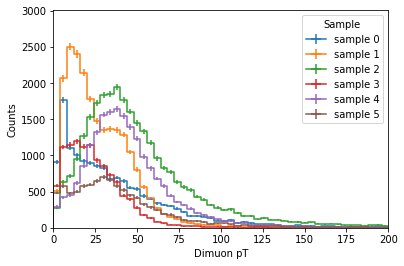

In [78]:
c = hist.Hist(
    "Counts",
    hist.Cat("sample", "Sample"),
    hist.Bin("dimuonpt", "Dimuon pT", 50, 0, 200)
)

for i in range(6):
    muons=samples[i].Muon
    cut = (muons.counts == 2) & (muons['charge'].prod() == -1)
    dimuons = muons[cut]
    name = "sample %d" % i
    c.fill(sample=name, dimuonpt=samples[i].Muon[cut].pt.flatten())
    
hist.plot1d(c, overlay="sample", )

/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


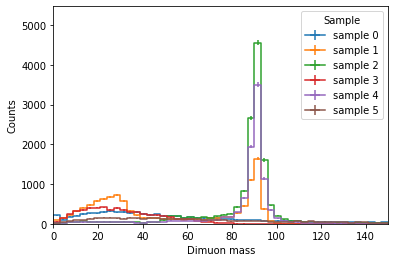

In [83]:
c = hist.Hist(
    "Counts",
    hist.Cat("sample", "Sample"),
    hist.Bin("dm", "Dimuon mass", 50, 0, 150)
)

for i in range(6):
    muons=samples[i].Muon
    cut = (muons.counts == 2) & (muons['charge'].prod() == -1)
    dimuons = samples[i].Muon[cut].choose(2)
    dmass=(dimuons.i0+dimuons.i1).mass
    name = "sample %d" % i
    c.fill(sample=name, dm=dmass.flatten())
    
ax=hist.plot1d(c, overlay="sample", )

/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(1, 4298.4)

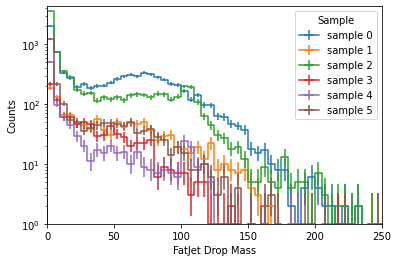

In [73]:
fdm = hist.Hist(
    "Counts",
    hist.Cat("sample", "Sample"),
    hist.Bin("fm", "FatJet Drop Mass", 50, 0, 250)
)

for i, sample in enumerate(samples):
    name = "sample %d" % i
    fdm.fill(sample=name, fm=sample.FatJet.msoftdrop.flatten())

ax = hist.plot1d(fdm, overlay="sample", )
ax.set_yscale('log')
ax.set_ylim(1, None)

/home/cms.oalterka/HATS-LPC2020/coffea-hats/coffea-hats/lib64/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


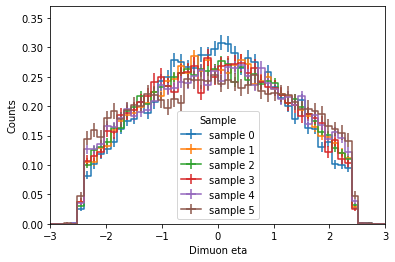

In [71]:
eta = hist.Hist(
    "Counts",
    hist.Cat("sample", "Sample"),
    hist.Bin("dimuoneta", "Dimuon eta", 50, -3, 3)
)

for i in range(6):
    muons=samples[i].Muon
    cut = (muons.counts == 2) & (muons['charge'].prod() == -1)
    dimuons = muons[cut]
    name = "sample %d" % i
    eta.fill(sample=name, dimuoneta=samples[i].Muon[cut].eta.flatten())
    
hist.plot1d(eta, overlay="sample", density="True")